# Daily Challenge (Scipy)

In [ ]:
# Dataset creation

import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})



In [ ]:
ninja_data.head()

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


In [ ]:
# 1. Data Transformation


# Normalization
ninja_data_normalized = (ninja_data - ninja_data.mean()) / ninja_data.std()

ninja_data_normalized.head()

,Time,Temperature,Pressure,Chemical Concentration
0,-1.729454,0.253054,1.444895,-0.206291
1,-1.725992,0.071093,1.468476,-0.187444
2,-1.722530,0.160811,1.375573,0.101064
3,-1.719067,0.346135,1.412122,0.004856
4,-1.715605,0.302714,1.420026,0.170552


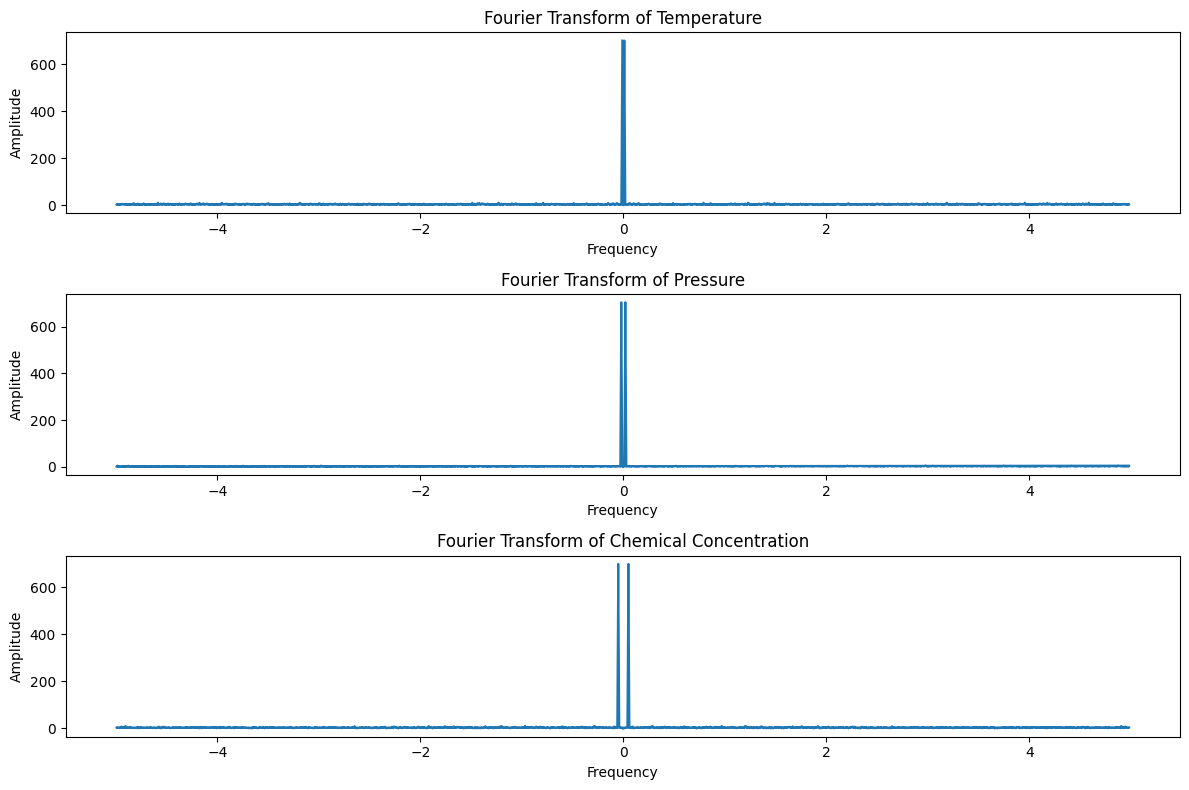

In [ ]:
from scipy.fft import fft
import matplotlib.pyplot as plt
import seaborn as sns

# Applying Fourier transformation to the data
fft_temperature = fft(ninja_data_normalized['Temperature'].to_numpy())
fft_pressure = fft(ninja_data_normalized['Pressure'].to_numpy())
fft_chemical_concentration = fft(ninja_data_normalized['Chemical Concentration'].to_numpy())

# Preparing for visualization of the Fourier transforms
fft_frequencies = np.fft.fftfreq(n_entries, d=(time[1] - time[0]))

# Visualization of Fourier Transforms
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

# Temperature FFT
axs[0].plot(fft_frequencies, np.abs(fft_temperature))
axs[0].set_title('Fourier Transform of Temperature')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Amplitude')

# Pressure FFT
axs[1].plot(fft_frequencies, np.abs(fft_pressure))
axs[1].set_title('Fourier Transform of Pressure')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Amplitude')

# Chemical Concentration FFT
axs[2].plot(fft_frequencies, np.abs(fft_chemical_concentration))
axs[2].set_title('Fourier Transform of Chemical Concentration')
axs[2].set_xlabel('Frequency')
axs[2].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()



In [ ]:
# Descriptive statistics


data_desc = ninja_data_normalized.describe()

data_desc

,Time,Temperature,Pressure,Chemical Concentration
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.684342e-17,2.273737e-16,-2.842171e-17,-4.121148e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.729454e+00,-1.700716e+00,-1.601678e+00,-1.691915e+00
25%,-8.647271e-01,-1.004320e+00,-9.984525e-01,-9.841460e-01
50%,1.229485e-16,8.753899e-03,-5.819063e-03,-1.307186e-02
75%,8.647271e-01,1.005051e+00,9.876893e-01,9.803748e-01
max,1.729454e+00,1.693152e+00,1.579772e+00,1.738253e+00


In [ ]:
# Correlation

correlation_matrix = ninja_data_normalized.corr()

correlation_matrix

,Time,Temperature,Pressure,Chemical Concentration
Time,1.000000,-0.770696,-0.001946,-0.156113
Temperature,-0.770696,1.000000,0.007112,-0.003277
Pressure,-0.001946,0.007112,1.000000,-0.000863
Chemical Concentration,-0.156113,-0.003277,-0.000863,1.000000


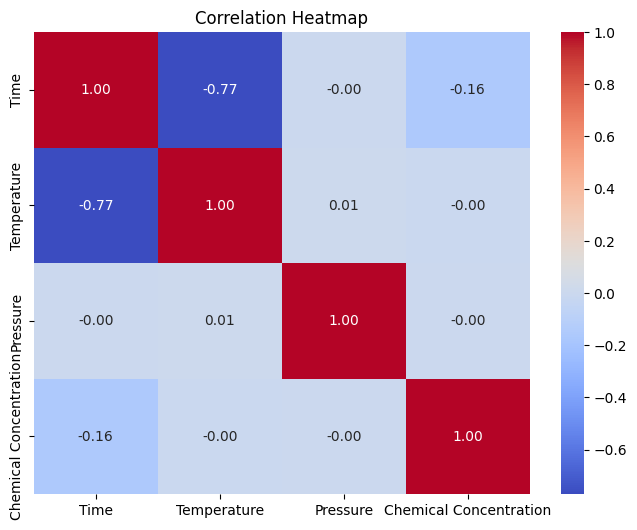

In [ ]:
# Plot a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

plt.show()

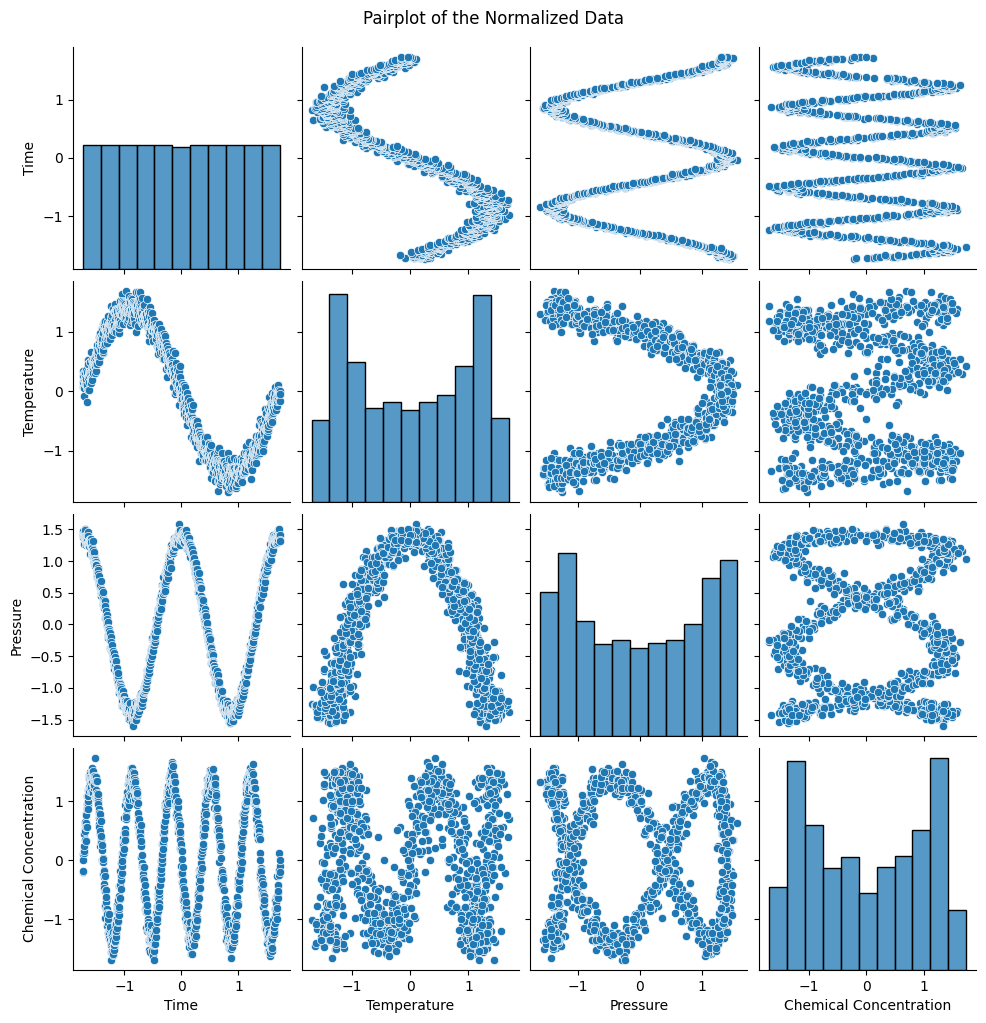

In [ ]:
# Pairplot

# Multi-dimensional scatter plot
sns.pairplot(ninja_data_normalized)
plt.suptitle("Pairplot of the Normalized Data", y=1.02)
plt.show()


# Introduction to web scrapping #1


In [ ]:
# urllib
from urllib.request import urlopen

url = 'https://en.wikipedia.org/wiki/Metronomy'

response = urlopen(url)

html = response.read()

html



b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Metronomy - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-

In [ ]:
# BeautifulSoup

from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'html.parser')

soup


<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Metronomy - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-featu

In [ ]:
# Prettify

print(soup.prettify())


<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Metronomy - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpr

In [ ]:
# Extract data

soup.html.head.title

<title>Metronomy - Wikipedia</title>

In [ ]:
# We can also use this shorter version

soup.title

<title>Metronomy - Wikipedia</title>

In [ ]:
# Get the content without the tags
soup.title.get_text()

'Metronomy - Wikipedia'

In [ ]:
soup.h1

<h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-main">Metronomy</span></h1>

In [ ]:
soup.h1.get_text()

'Metronomy'

In [ ]:
# No tag Consequence
print(soup.h4)

None


## Challenge Best movie category
c) soup.div.ul.h2.get_text() won't work (not structured this way)


In [ ]:
soup.p


<p class="mw-empty-elt">
</p>

In [ ]:
# Find all tags

all_ps = soup.find_all('p')
print(all_ps)


[<p class="mw-empty-elt">
</p>, <p><b>Metronomy</b> are an English <a href="/wiki/Electronic_music" title="Electronic music">electronic music</a> band, formed in <a href="/wiki/Totnes" title="Totnes">Totnes</a> in 1999. Their lineup consists of founding member and leader <a href="/wiki/Joseph_Mount" title="Joseph Mount">Joseph Mount</a> (vocals, keyboards, guitar), Oscar Cash (keyboards, backing vocals, guitar, saxophone), Anna Prior (drums, backing vocals), <a href="/wiki/Olugbenga_Adelekan" title="Olugbenga Adelekan">Olugbenga Adelekan</a> (bass, backing vocals), and Michael Lovett (keyboards, guitar).<sup class="reference" id="cite_ref-2"><a href="#cite_note-2"><span class="cite-bracket">[</span>2<span class="cite-bracket">]</span></a></sup> Their music consists of vocal and instrumental electronic pop music.
</p>, <p>Metronomy have released seven studio albums: <i><a class="mw-redirect" href="/wiki/Pip_Paine_(Pay_The_%C2%A35000_You_Owe)" title="Pip Paine (Pay The £5000 You Owe)">Pi

In [ ]:
# And we can select the one we want

all_ps[1]

<p><b>Metronomy</b> are an English <a href="/wiki/Electronic_music" title="Electronic music">electronic music</a> band, formed in <a href="/wiki/Totnes" title="Totnes">Totnes</a> in 1999. Their lineup consists of founding member and leader <a href="/wiki/Joseph_Mount" title="Joseph Mount">Joseph Mount</a> (vocals, keyboards, guitar), Oscar Cash (keyboards, backing vocals, guitar, saxophone), Anna Prior (drums, backing vocals), <a href="/wiki/Olugbenga_Adelekan" title="Olugbenga Adelekan">Olugbenga Adelekan</a> (bass, backing vocals), and Michael Lovett (keyboards, guitar).<sup class="reference" id="cite_ref-2"><a href="#cite_note-2"><span class="cite-bracket">[</span>2<span class="cite-bracket">]</span></a></sup> Their music consists of vocal and instrumental electronic pop music.
</p>

In [ ]:
all_ps[1].get_text()

'Metronomy are an English electronic music band, formed in Totnes in 1999. Their lineup consists of founding member and leader Joseph Mount (vocals, keyboards, guitar), Oscar Cash (keyboards, backing vocals, guitar, saxophone), Anna Prior (drums, backing vocals), Olugbenga Adelekan (bass, backing vocals), and Michael Lovett (keyboards, guitar).[2] Their music consists of vocal and instrumental electronic pop music.\n'

In [ ]:
soup.find_all('h2')

[<h2 class="vector-pinnable-header-label">Contents</h2>,
 <h2 id="Biography">Biography</h2>,
 <h2 id="Live_performances">Live performances</h2>,
 <h2 id="Band_members">Band members</h2>,
 <h2 id="Discography">Discography</h2>,
 <h2 id="Awards_and_nominations">Awards and nominations</h2>,
 <h2 id="References">References</h2>,
 <h2 id="External_links">External links</h2>]

In [ ]:
soup.find_all('h2')[3]

<h2 id="Band_members">Band members</h2>

In [ ]:
# Lists

soup.ul.find_all('li')

[<li class="mw-list-item" id="n-mainpage-description"><a accesskey="z" href="/wiki/Main_Page" title="Visit the main page [z]"><span>Main page</span></a></li>,
 <li class="mw-list-item" id="n-contents"><a href="/wiki/Wikipedia:Contents" title="Guides to browsing Wikipedia"><span>Contents</span></a></li>,
 <li class="mw-list-item" id="n-currentevents"><a href="/wiki/Portal:Current_events" title="Articles related to current events"><span>Current events</span></a></li>,
 <li class="mw-list-item" id="n-randompage"><a accesskey="x" href="/wiki/Special:Random" title="Visit a randomly selected article [x]"><span>Random article</span></a></li>,
 <li class="mw-list-item" id="n-aboutsite"><a href="/wiki/Wikipedia:About" title="Learn about Wikipedia and how it works"><span>About Wikipedia</span></a></li>,
 <li class="mw-list-item" id="n-contactpage"><a href="//en.wikipedia.org/wiki/Wikipedia:Contact_us" title="How to contact Wikipedia"><span>Contact us</span></a></li>,
 <li class="mw-list-item" id

In [ ]:
for element in soup.ul.find_all('li'):
  print(element.get_text())

Main page
Contents
Current events
Random article
About Wikipedia
Contact us
Donate


In [ ]:
soup.ul.find_all('li', limit = 2)

[<li class="mw-list-item" id="n-mainpage-description"><a accesskey="z" href="/wiki/Main_Page" title="Visit the main page [z]"><span>Main page</span></a></li>,
 <li class="mw-list-item" id="n-contents"><a href="/wiki/Wikipedia:Contents" title="Guides to browsing Wikipedia"><span>Contents</span></a></li>]

In [ ]:
soup.find_all(['h3', 'li'])

[<li class="mw-list-item" id="n-mainpage-description"><a accesskey="z" href="/wiki/Main_Page" title="Visit the main page [z]"><span>Main page</span></a></li>,
 <li class="mw-list-item" id="n-contents"><a href="/wiki/Wikipedia:Contents" title="Guides to browsing Wikipedia"><span>Contents</span></a></li>,
 <li class="mw-list-item" id="n-currentevents"><a href="/wiki/Portal:Current_events" title="Articles related to current events"><span>Current events</span></a></li>,
 <li class="mw-list-item" id="n-randompage"><a accesskey="x" href="/wiki/Special:Random" title="Visit a randomly selected article [x]"><span>Random article</span></a></li>,
 <li class="mw-list-item" id="n-aboutsite"><a href="/wiki/Wikipedia:About" title="Learn about Wikipedia and how it works"><span>About Wikipedia</span></a></li>,
 <li class="mw-list-item" id="n-contactpage"><a href="//en.wikipedia.org/wiki/Wikipedia:Contact_us" title="How to contact Wikipedia"><span>Contact us</span></a></li>,
 <li class="mw-list-item" id

In [ ]:
soup.find_all('li', string = 'Oscar Cash')

[<li><b>Oscar Cash</b></li>]

In [ ]:
soup.find_all('li', {'class' : 'mw-cite-backlink'})

[]

# Introduction to web scrapping #2

In [ ]:
html = """
    <html>
     <head>
         <title>2020 Oscar nominees and winners</title>
     </head>
     <body>
         <h1 id="oscar_title">Oscars 2020</h1>
         <p>The biggest cinema awards ceremony took place in February. This year's highlights were:</p>
         <ul class="highlights">
             <li>Joker</li>
             <li>1917</li>
             <li>Once Upon a Time in Hollywood</li>
             <li>The Irishman</li>
         </ul>
         <p>See the winners of 3 categories below.</p>
         <div>
             <div class="best-film-category">
                 <h2>Category: best film</h2>
                 <ul>
                     <li>Ford vs Ferrari</li>
                     <li>The Irishman</li>
                     <li>JoJo Rabbit</li>
                     <li>Joker</li>
                     <li>Little Women</li>
                     <li>Marriage Story</li>
                     <li>1917</li>
                     <li>Once Upon a Time in Hollywood</li>
                     <li class="winner">Parasite <strong>[WINNER]</strong></li>
                 </ul>
             </div>
             <br>
             <div class="best-actor-category">
                 <h2>Category: best actor</h2>
                 <ul>
                     <li>Antonio Banderas - Pain and Glory</li>
                     <li>Leonardo DiCaprio - Once Upon a Time In... Hollywood</li>
                     <li>Adam Driver - Marriage Story</li>
                     <li class="winner">Joaquin Phoenix - Joker <strong>[WINNER]</strong></li>
                     <li>Jonathan Price - The Two Popes</li>
                 </ul>
             </div>
             <br>
             <div class="best-actress-category">
                 <h2>Category: best actress</h2>
                 <ul>
                     <li>Cythia Erivo - Harriet</li>
                     <li>Scarlett Johansson - Marriage Story</li>
                     <li>Saoirse Ronan - Little Women</li>
                     <li>Charlize Theron - The Scandal</li>
                     <li class="winner">Renée Zellweger - Judy: Far Over the Rainbow <strong>[WINNER]</strong></li>
                 </ul>
             </div>
         </div>
     </body>
</html>"""

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'html.parser')

print(soup.prettify())


<html>
 <head>
  <title>
   2020 Oscar nominees and winners
  </title>
 </head>
 <body>
  <h1 id="oscar_title">
   Oscars 2020
  </h1>
  <p>
   The biggest cinema awards ceremony took place in February. This year's highlights were:
  </p>
  <ul class="highlights">
   <li>
    Joker
   </li>
   <li>
    1917
   </li>
   <li>
    Once Upon a Time in Hollywood
   </li>
   <li>
    The Irishman
   </li>
  </ul>
  <p>
   See the winners of 3 categories below.
  </p>
  <div>
   <div class="best-film-category">
    <h2>
     Category: best film
    </h2>
    <ul>
     <li>
      Ford vs Ferrari
     </li>
     <li>
      The Irishman
     </li>
     <li>
      JoJo Rabbit
     </li>
     <li>
      Joker
     </li>
     <li>
      Little Women
     </li>
     <li>
      Marriage Story
     </li>
     <li>
      1917
     </li>
     <li>
      Once Upon a Time in Hollywood
     </li>
     <li class="winner">
      Parasite
      <strong>
       [WINNER]
      </strong>
     </li>
    </ul>
   

In [ ]:
print(soup.title)

<title>2020 Oscar nominees and winners</title>


In [ ]:
print(soup.title.get_text())

2020 Oscar nominees and winners


In [ ]:
print(soup.find_all('h2'))

[<h2>Category: best film</h2>, <h2>Category: best actor</h2>, <h2>Category: best actress</h2>]


In [ ]:
print(soup.ul.li)

<li>Joker</li>


In [ ]:
soup.find_all(class_='best-actress-category')[0].find_all('li')

[<li>Cythia Erivo - Harriet</li>,
 <li>Scarlett Johansson - Marriage Story</li>,
 <li>Saoirse Ronan - Little Women</li>,
 <li>Charlize Theron - The Scandal</li>,
 <li class="winner">Renée Zellweger - Judy: Far Over the Rainbow <strong>[WINNER]</strong></li>]

In [ ]:
# Requests library (better for dynamic pages)

import requests
from bs4 import BeautifulSoup

url = 'https://www.scrapethissite.com/pages/simple/'

response = requests.get(url)

websoup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
websoup.title.get_text()

'Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping'

In [ ]:
countries_raw = websoup.find_all(class_ = 'country-name')
countries_raw

[<h3 class="country-name">
 <i class="flag-icon flag-icon-ad"></i>
                             Andorra
                         </h3>,
 <h3 class="country-name">
 <i class="flag-icon flag-icon-ae"></i>
                             United Arab Emirates
                         </h3>,
 <h3 class="country-name">
 <i class="flag-icon flag-icon-af"></i>
                             Afghanistan
                         </h3>,
 <h3 class="country-name">
 <i class="flag-icon flag-icon-ag"></i>
                             Antigua and Barbuda
                         </h3>,
 <h3 class="country-name">
 <i class="flag-icon flag-icon-ai"></i>
                             Anguilla
                         </h3>,
 <h3 class="country-name">
 <i class="flag-icon flag-icon-al"></i>
                             Albania
                         </h3>,
 <h3 class="country-name">
 <i class="flag-icon flag-icon-am"></i>
                             Armenia
                         </h3>,
 <h3 class="countr

In [ ]:
countries = [country.get_text().strip() for country in countries_raw]

In [ ]:
countries

['Andorra',
 'United Arab Emirates',
 'Afghanistan',
 'Antigua and Barbuda',
 'Anguilla',
 'Albania',
 'Armenia',
 'Angola',
 'Antarctica',
 'Argentina',
 'American Samoa',
 'Austria',
 'Australia',
 'Aruba',
 'Åland',
 'Azerbaijan',
 'Bosnia and Herzegovina',
 'Barbados',
 'Bangladesh',
 'Belgium',
 'Burkina Faso',
 'Bulgaria',
 'Bahrain',
 'Burundi',
 'Benin',
 'Saint Barthélemy',
 'Bermuda',
 'Brunei',
 'Bolivia',
 'Bonaire',
 'Brazil',
 'Bahamas',
 'Bhutan',
 'Bouvet Island',
 'Botswana',
 'Belarus',
 'Belize',
 'Canada',
 'Cocos [Keeling] Islands',
 'Democratic Republic of the Congo',
 'Central African Republic',
 'Republic of the Congo',
 'Switzerland',
 'Ivory Coast',
 'Cook Islands',
 'Chile',
 'Cameroon',
 'China',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Cape Verde',
 'Curacao',
 'Christmas Island',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Estonia',
 'Egypt',
 'Western Sahara',
 'Eritrea',
 

In [ ]:
countries[4:10]

['Anguilla', 'Albania', 'Armenia', 'Angola', 'Antarctica', 'Argentina']

In [ ]:
# Let's bring pandas

import pandas as pd

In [ ]:
capitals_raw = websoup.find_all(class_ = 'country-capital')
capitals_raw

[<span class="country-capital">Andorra la Vella</span>,
 <span class="country-capital">Abu Dhabi</span>,
 <span class="country-capital">Kabul</span>,
 <span class="country-capital">St. John's</span>,
 <span class="country-capital">The Valley</span>,
 <span class="country-capital">Tirana</span>,
 <span class="country-capital">Yerevan</span>,
 <span class="country-capital">Luanda</span>,
 <span class="country-capital">None</span>,
 <span class="country-capital">Buenos Aires</span>,
 <span class="country-capital">Pago Pago</span>,
 <span class="country-capital">Vienna</span>,
 <span class="country-capital">Canberra</span>,
 <span class="country-capital">Oranjestad</span>,
 <span class="country-capital">Mariehamn</span>,
 <span class="country-capital">Baku</span>,
 <span class="country-capital">Sarajevo</span>,
 <span class="country-capital">Bridgetown</span>,
 <span class="country-capital">Dhaka</span>,
 <span class="country-capital">Brussels</span>,
 <span class="country-capital">Ouagado

In [ ]:
capitals = [capital.get_text().strip() for capital in capitals_raw]
capitals

['Andorra la Vella',
 'Abu Dhabi',
 'Kabul',
 "St. John's",
 'The Valley',
 'Tirana',
 'Yerevan',
 'Luanda',
 'None',
 'Buenos Aires',
 'Pago Pago',
 'Vienna',
 'Canberra',
 'Oranjestad',
 'Mariehamn',
 'Baku',
 'Sarajevo',
 'Bridgetown',
 'Dhaka',
 'Brussels',
 'Ouagadougou',
 'Sofia',
 'Manama',
 'Bujumbura',
 'Porto-Novo',
 'Gustavia',
 'Hamilton',
 'Bandar Seri Begawan',
 'Sucre',
 'Kralendijk',
 'Brasília',
 'Nassau',
 'Thimphu',
 'None',
 'Gaborone',
 'Minsk',
 'Belmopan',
 'Ottawa',
 'West Island',
 'Kinshasa',
 'Bangui',
 'Brazzaville',
 'Bern',
 'Yamoussoukro',
 'Avarua',
 'Santiago',
 'Yaoundé',
 'Beijing',
 'Bogotá',
 'San José',
 'Havana',
 'Praia',
 'Willemstad',
 'Flying Fish Cove',
 'Nicosia',
 'Prague',
 'Berlin',
 'Djibouti',
 'Copenhagen',
 'Roseau',
 'Santo Domingo',
 'Algiers',
 'Quito',
 'Tallinn',
 'Cairo',
 'Laâyoune / El Aaiún',
 'Asmara',
 'Madrid',
 'Addis Ababa',
 'Helsinki',
 'Suva',
 'Stanley',
 'Palikir',
 'Tórshavn',
 'Paris',
 'Libreville',
 'London',
 "

In [ ]:
populations_raw = websoup.find_all(class_ = 'country-population')
print(populations_raw)

[<span class="country-population">84000</span>, <span class="country-population">4975593</span>, <span class="country-population">29121286</span>, <span class="country-population">86754</span>, <span class="country-population">13254</span>, <span class="country-population">2986952</span>, <span class="country-population">2968000</span>, <span class="country-population">13068161</span>, <span class="country-population">0</span>, <span class="country-population">41343201</span>, <span class="country-population">57881</span>, <span class="country-population">8205000</span>, <span class="country-population">21515754</span>, <span class="country-population">71566</span>, <span class="country-population">26711</span>, <span class="country-population">8303512</span>, <span class="country-population">4590000</span>, <span class="country-population">285653</span>, <span class="country-population">156118464</span>, <span class="country-population">10403000</span>, <span class="country-population

In [ ]:
populations = [population.get_text().strip() for population in populations_raw]
print(populations)

['84000', '4975593', '29121286', '86754', '13254', '2986952', '2968000', '13068161', '0', '41343201', '57881', '8205000', '21515754', '71566', '26711', '8303512', '4590000', '285653', '156118464', '10403000', '16241811', '7148785', '738004', '9863117', '9056010', '8450', '65365', '395027', '9947418', '18012', '201103330', '301790', '699847', '0', '2029307', '9685000', '314522', '33679000', '628', '70916439', '4844927', '3039126', '7581000', '21058798', '21388', '16746491', '19294149', '1330044000', '47790000', '4516220', '11423000', '508659', '141766', '1500', '1102677', '10476000', '81802257', '740528', '5484000', '72813', '9823821', '34586184', '14790608', '1291170', '80471869', '273008', '5792984', '46505963', '88013491', '5244000', '875983', '2638', '107708', '48228', '64768389', '1545255', '62348447', '107818', '4630000', '195506', '65228', '24339838', '27884', '56375', '1593256', '10324025', '443000', '1014999', '11000000', '30', '13550440', '159358', '1565126', '748486', '689868

In [ ]:
areas_raw = websoup.find_all(class_ = 'country-area')
print(areas_raw)

[<span class="country-area">468.0</span>, <span class="country-area">82880.0</span>, <span class="country-area">647500.0</span>, <span class="country-area">443.0</span>, <span class="country-area">102.0</span>, <span class="country-area">28748.0</span>, <span class="country-area">29800.0</span>, <span class="country-area">1246700.0</span>, <span class="country-area">1.4E7</span>, <span class="country-area">2766890.0</span>, <span class="country-area">199.0</span>, <span class="country-area">83858.0</span>, <span class="country-area">7686850.0</span>, <span class="country-area">193.0</span>, <span class="country-area">1580.0</span>, <span class="country-area">86600.0</span>, <span class="country-area">51129.0</span>, <span class="country-area">431.0</span>, <span class="country-area">144000.0</span>, <span class="country-area">30510.0</span>, <span class="country-area">274200.0</span>, <span class="country-area">110910.0</span>, <span class="country-area">665.0</span>, <span class="coun

In [ ]:
areas = [area.get_text().strip() for area in areas_raw]
print(areas)

['468.0', '82880.0', '647500.0', '443.0', '102.0', '28748.0', '29800.0', '1246700.0', '1.4E7', '2766890.0', '199.0', '83858.0', '7686850.0', '193.0', '1580.0', '86600.0', '51129.0', '431.0', '144000.0', '30510.0', '274200.0', '110910.0', '665.0', '27830.0', '112620.0', '21.0', '53.0', '5770.0', '1098580.0', '328.0', '8511965.0', '13940.0', '47000.0', '49.0', '600370.0', '207600.0', '22966.0', '9984670.0', '14.0', '2345410.0', '622984.0', '342000.0', '41290.0', '322460.0', '240.0', '756950.0', '475440.0', '9596960.0', '1138910.0', '51100.0', '110860.0', '4033.0', '444.0', '135.0', '9250.0', '78866.0', '357021.0', '23000.0', '43094.0', '754.0', '48730.0', '2381740.0', '283560.0', '45226.0', '1001450.0', '266000.0', '121320.0', '504782.0', '1127127.0', '337030.0', '18270.0', '12173.0', '702.0', '1399.0', '547030.0', '267667.0', '244820.0', '344.0', '69700.0', '91000.0', '78.0', '239460.0', '6.5', '2166086.0', '11300.0', '245857.0', '1780.0', '28051.0', '131940.0', '3903.0', '108890.0', '5

In [ ]:
# Let's create our DataFrame

data = pd.DataFrame(
    {
        'Country' : countries,
        'Capital' : capitals,
        'Population' : populations,
        'Area' : areas

    }
)


In [ ]:
data.head()

,Country,Capital,Population,Area
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0


In [ ]:
data[data['Country'] == 'France']

,Country,Capital,Population,Area
74,France,Paris,64768389,547030.0
